### Stroop test data analysis

I will analyse data gathered during Stroop experiment.

Assumed significance level $\alpha=0.05$

In [1]:
import pandas as pd

In [2]:
from scipy.stats import t as t_dist

In [3]:
%matplotlib inline

In [4]:
dane = pd.read_csv('stroopdata.csv')

In [5]:
dane.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


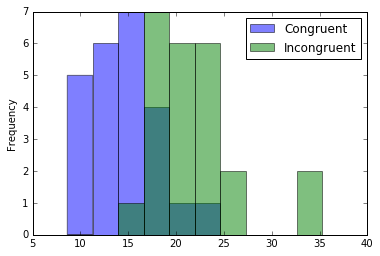

In [6]:
dane.plot(kind='hist',alpha=0.5)

From histogram above it can be seen that both groups differ. It has to be checked by valid test if difference is significant, but it is visible on chart that results for Incongruent tasks are worse.

Dependent variable is the time that it takes to name the ink colors in equally-sized lists.
Independent variable is Color Congruency.

I would like to perform two-tailed t-test for paired samples, because experiment had within-subject design(paired-samples) and change can occur in both directions(two-tailed). I should consider if data are normally distributed, because our sample has less than 30 observations. As data are average of n trials for 24 subjects due to Central Limit Theorem their distribution converge to normal distribution, so I can use t-test.

\mu_C: population mean for congruent part of experiment
\mu_I: population mean for incongruent part of experiment

$H_0:\mu_C = \mu_I$

Mean value of time needed to complete is equal in both groups

$H_a:\mu_C <> \mu_I$

Mean value of time needed to complete is different in both groups

In [7]:
dane['diff']=dane['Incongruent']-dane['Congruent']

In [8]:
d = dane['diff'].sum()/24
print d

7.96479166667


\bar x_C: sample mean for congruent test
\bar x_I: sample mean for incongruent version

$d = \bar x_I - \bar x_C = 7.96$

In [9]:
s = (dane['diff'].apply(lambda x: (x-dane['diff'].sum()/24)**2).sum()/23)**.5
print s

4.86482691036


$s_D = 4.86$

In [10]:
t = d/(s/24**.5)
print t

8.02070694411


In [11]:
print t_dist.ppf(0.025, 23)

-2.06865761042


Critical values for two-tailed t-test at $\alpha=0.05$ and 23 df are +/-2.069

In [12]:
print 2*(1 - t_dist.cdf(t, 23))

4.10300058373e-08


p-value for this t-test is $4.10300058373e-08$

As p-value for this test is lower from accepted $\alpha$ I can reject null hypothesis about equality of means.
This result match with expectations. Longer times for incongruent group can be casued by some kind of cognitive dissonance, when read word states something other than we can observe. It seems that judging colours of words when they are connected with their meaning is easier.

More experiments that can be tried[1]:
* Turn the words upside down or rotate them 90 degrees.
* Turn the words "inside out."
* Use non-color words such as "dog" or "house."
* Use nonsense words such as "kiw" or "thoz."
* Compare long words to short words.
* Use emotional words such as "sad" or "happy" or "depressed" or "angry."
* Color only half of the word or color only the first and last letter of each word.

Citations:

[1]https://faculty.washington.edu/chudler/words.html#seffect